# 1. Understanding the Dataset

## Import all necessary libraries

In [41]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

## Import/Read file

In [2]:
# Read the Excel file
df = pd.read_excel(r"C:\Users\Arya\Downloads\titanic3.xls")


In [3]:
# Display the first few rows of the data
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

# 2.Perform Exploratory Data Analysis (EDA) to understand the distribution of data.

In [4]:
df.shape #checking the size of the data

(1309, 14)

In [5]:
df.info() #checking the Data types of Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
df.isnull().sum() #checking if there are any missing values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
##Handling null values

In [8]:
# Drop rows where the 'embarked' column has null values
df = df.dropna(subset=['embarked'])
df = df.dropna(subset=['fare'])

In [9]:
# Drop the column by its name
df = df.drop('cabin', axis=1)

In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1306.000000,1306.000000,1043.000000,1306.00000,1306.000000,1306.000000,120.000000
mean,2.296325,0.381317,29.813199,0.50000,0.385911,33.223956,159.975000
std,0.837037,0.485896,14.366261,1.04258,0.866357,51.765986,97.672103
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.00000,0.000000,7.895800,71.500000
50%,3.000000,0.000000,28.000000,0.00000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,39.000000,1.00000,0.000000,31.275000,255.250000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200,328.000000


(array([ 72.,  62., 274., 250., 160., 108.,  65.,  39.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

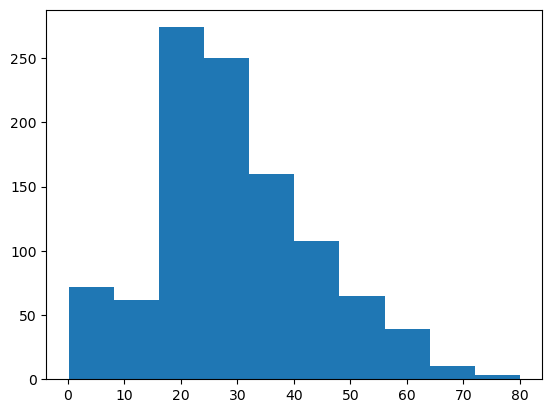

In [11]:
plt.hist(df['age'])

<Axes: ylabel='age'>

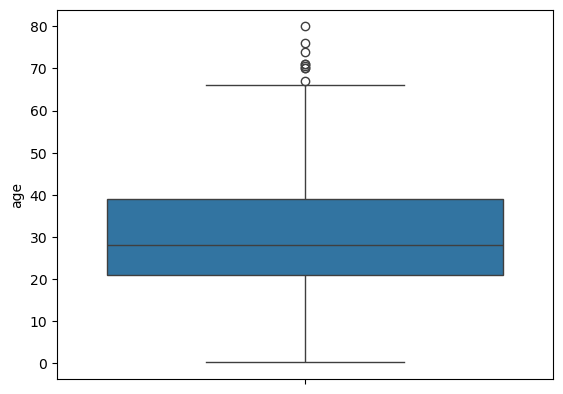

In [12]:
sns.boxplot(df['age'])

In [13]:
# Replace NaN values in the 'age' column with the mean value of 'age'
df['age'] = df['age'].fillna(df['age'].mean())

In [14]:
df.duplicated().sum() #checking if there are any duplicate values

0

In [15]:
# making a new column depicting bodies that were found dead or alive
df['found'] = df['boat'].astype(str) + ', ' + df['body'].astype(str)

In [16]:
df['found'] = df['found'].replace('nan, nan', 0)
# Replace 0 with NaN in a specific column
df['found'] = df['found'].replace(0, np.nan)

In [17]:
# Get the number of unique values in a column
num_unique_values = df['home.dest'].nunique()
num_unique_values

368

In [18]:
df.isnull().sum() 

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
boat          822
body         1186
home.dest     562
found         702
dtype: int64

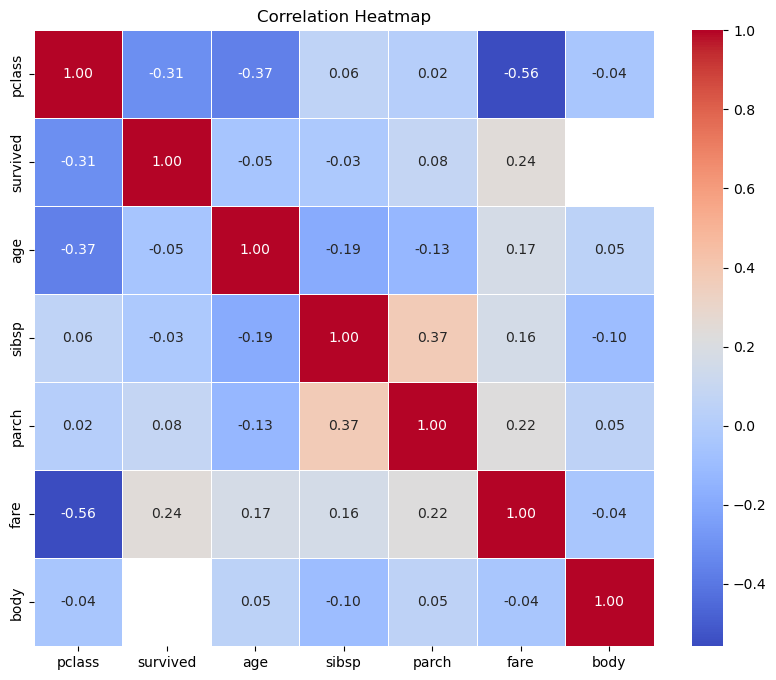

In [19]:
correlation_matrix = df.corr(numeric_only=True) #checking for correlations

# Create heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Displaying the plot
plt.title('Correlation Heatmap')
plt.show()

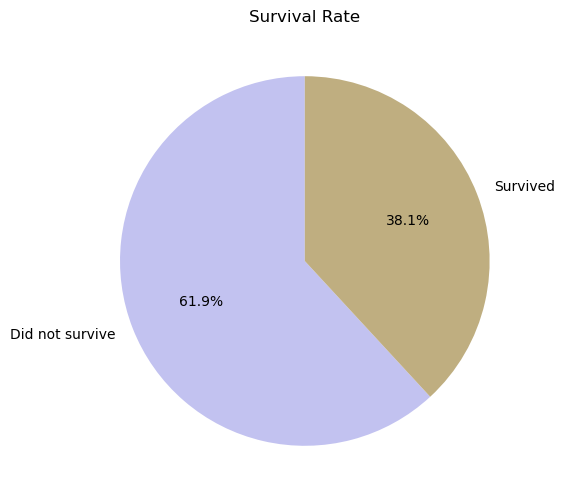

In [20]:
# Replace 0 with 'Did not survive' and 1 with 'Survived' in the 'Survived' column
df['survived'] = df['survived'].replace({0: 'Did not survive', 1: 'Survived'})

# Count the occurrences of each label (Survived/Did not survive)
survival_counts = df['survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%', startangle=90, colors=['#c2c2f0','#bfae80'])

# Add a title
plt.title('Survival Rate')

# Display the pie chart
plt.show()


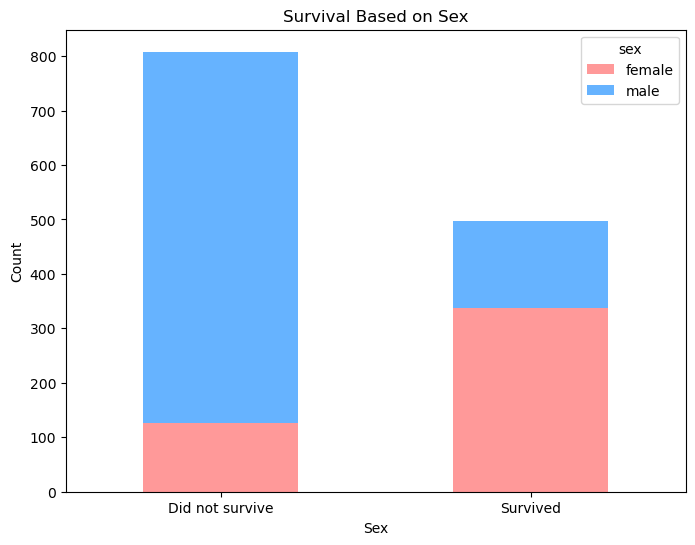

In [21]:
# First, group by 'Sex' and 'Survived' and count the occurrences
survival_sex = df.groupby(['survived', 'sex']).size().unstack()

# Plot a stacked bar chart
ax = survival_sex.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(8, 6))

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Based on Sex')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show the plot
plt.show()


<Axes: xlabel='age', ylabel='Count'>

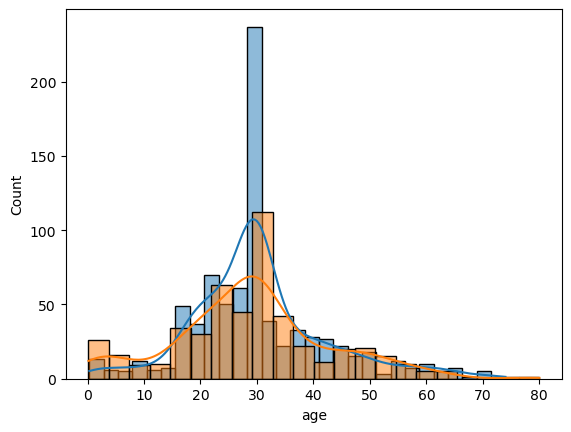

In [22]:
# histplot (Numerical – Categorical)

sns.histplot(df[df['survived']=='Did not survive']['age'], kde=True)
sns.histplot(df[df['survived']=='Survived']['age'], kde=True)

<Axes: xlabel='survived', ylabel='pclass'>

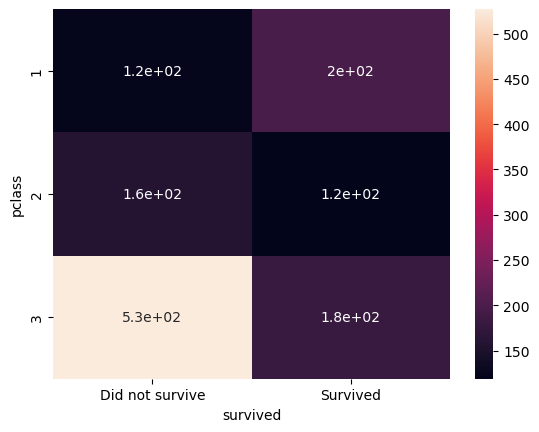

In [23]:
sns.heatmap(pd.crosstab(df['pclass'],df['survived']), annot=True)

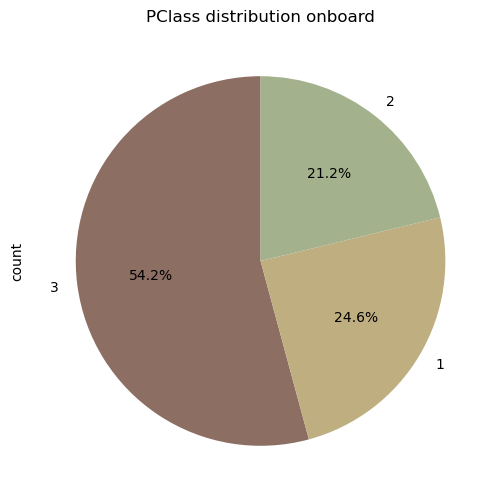

In [24]:
# Get the frequency count of categories in the 'Category' column
category_counts = df['pclass'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the figure size for better clarity
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#8d6e63', '#bfae80', '#a3b18c'])

# Add a title
plt.title('PClass distribution onboard')

# Show the plot
plt.show()


# 3.Data Preprocessing

## Encode categorical variables using label encoding or one-hot encoding.

In [25]:
# Replace 'male' with 0 and 'female' with 1 in the 'Sex' column
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

In [26]:
# Replace 'Did not survive' with 0 and 'Survived' with 1 in the 'survived' column
df['survived'] = df['survived'].replace({'Did not survive': 0, 'Survived': 1})

## Split the dataset into training and testing sets (e.g., 80-20 split).

In [34]:
from sklearn.model_selection import train_test_split

# X represents your features (independent variables)
# y represents your target variable (dependent variable)
features = ['pclass', 'sex', 'age', 'fare']
X = df[features]
y = df['survived']  # The target variable

# Split data into training and testing sets (split this into multiple boxes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Applying a Machine Learning Model

In [35]:
# Build and train the RandomForestClassifier model (split this into multiple boxes)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       154
           1       0.76      0.72      0.74       108

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.79       262
weighted avg       0.79      0.79      0.79       262



# 5.Evaluating Model Performance

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       154
           1       0.76      0.72      0.74       108

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.79       262
weighted avg       0.79      0.79      0.79       262



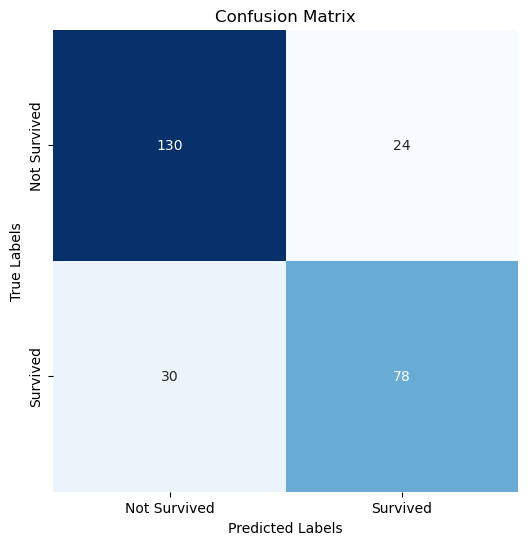

In [42]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

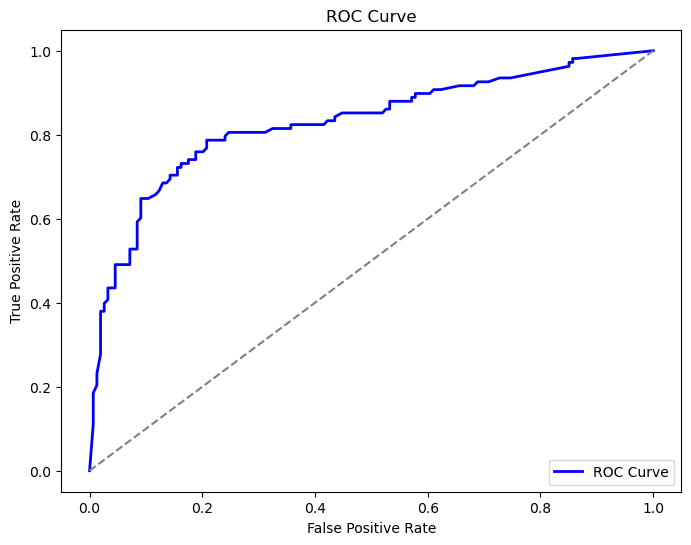

AUC-ROC Score: 0.83


In [43]:
# Calculate probabilities of class 1 (survived)
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, probs)
print(f'AUC-ROC Score: {auc_roc:.2f}')